In [2]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/rerkki/data-analytics-ml/refs/heads/main/datasets/NHL.csv", encoding='latin-1')
df

,Rk,Player,Age,Pos,Tm,GP,G,A,PTS,plusminus,...,TOI,ATOI,BLK,HIT,FOW,FOL,FO_percent,HART,Votes,Season
0,1,Connor McDavid\mcdavco01,20,C,EDM,82,30,70,100,27,...,1733,21.133333,29.0,34,348.0,458.0,43.2,1,1604,2017
1,2,Sidney Crosby\crosbsi01,29,C,PIT,75,44,45,89,17,...,1491,19.883333,27.0,80,842.0,906.0,48.2,0,1104,2017
2,3,Patrick Kane\kanepa01,28,RW,CHI,82,34,55,89,11,...,1754,21.400000,15.0,28,7.0,44.0,13.7,0,206,2017
3,4,Nicklas Backstrom\backsni02,29,C,WSH,82,23,63,86,17,...,1497,18.266667,33.0,45,685.0,648.0,51.4,0,60,2017
4,5,Nikita Kucherov\kucheni01,23,RW,TBL,74,40,45,85,13,...,1438,19.433333,20.0,30,0.0,0.0,0.0,0,119,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13181,886,Zach Trotman\trotmza01,27,D,PIT,3,0,0,0,-3,...,38,12.800000,2.0,1,0.0,0.0,NaN,0,0,2018
13182,887,Dominic Turgeon\turgedo01,21,C,DET,5,0,0,0,-2,...,46,9.200000,8.0,3,7.0,14.0,33.3,0,0,2018
13183,888,Rinat Valiev\valieri01,22,D,MTL,2,0,0,0,0,...,24,11.800000,2.0,0,0.0,0.0,NaN,0,0,2018
13184,889,Curtis Valk\valkcu01,24,LW,FLA,1,0,0,0,0,...,3,3.400000,0.0,1,0.0,3.0,0.0,0,0,2018


# Task
Perform a clustering analysis on the provided NHL dataset to identify distinct player characteristics. This involves preparing the data by selecting relevant numerical features and handling missing values, determining the optimal number of clusters using the Elbow Method, applying K-Means clustering, characterizing each cluster by analyzing feature means, and visualizing the clusters using PCA. Finally, summarize the distinct player characteristics identified by the analysis.

## Data Preparation for Clustering

### Subtask:
Prepare the dataset by selecting relevant numerical features for clustering, handling any missing values (e.g., imputation or dropping), and scaling the features to ensure equal contribution during clustering. Columns like 'Player', 'Tm', 'Pos', 'Rk', 'Season', 'HART', and 'Votes' will be excluded from the clustering features initially.


**Reasoning**:
First, I need to identify and select the numerical columns from the original DataFrame, excluding the specified non-relevant columns, to create the `df_clustering` DataFrame. This sets up the data with only the features suitable for clustering.



In [3]:
import numpy as np

# Identify numerical columns excluding the specified ones
excluded_columns = ['Player', 'Tm', 'Pos', 'Rk', 'Season', 'HART', 'Votes']
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Filter out the excluded columns from the numerical columns list
clustering_features = [col for col in numerical_cols if col not in excluded_columns]

# Create the df_clustering DataFrame with only the selected numerical features
df_clustering = df[clustering_features].copy()

print("Selected features for clustering:")
print(df_clustering.head())

Selected features for clustering:
   Age  GP   G   A  PTS  plusminus  PIM    PS  EV  PP  ...  SH.1    S  \
0   20  82  30  70  100         27   26  12.8  26   3  ...     1  251   
1   29  75  44  45   89         17   24  12.3  30  14  ...     0  255   
2   28  82  34  55   89         11   32  10.8  27   7  ...     0  292   
3   29  82  23  63   86         17   38   9.9  15   8  ...     0  162   
4   23  74  40  45   85         13   38  12.0  23  17  ...     0  246   

   S_percent   TOI       ATOI   BLK  HIT    FOW    FOL  FO_percent  
0       12.0  1733  21.133333  29.0   34  348.0  458.0        43.2  
1       17.3  1491  19.883333  27.0   80  842.0  906.0        48.2  
2       11.6  1754  21.400000  15.0   28    7.0   44.0        13.7  
3       14.2  1497  18.266667  33.0   45  685.0  648.0        51.4  
4       16.3  1438  19.433333  20.0   30    0.0    0.0         0.0  

[5 rows x 24 columns]


**Reasoning**:
Now that `df_clustering` has been created with the relevant numerical features, I will handle any missing values by imputing them with the mean of their respective columns. Following this, I will scale the features using `StandardScaler` to ensure all features contribute equally to the clustering process.



In [4]:
from sklearn.preprocessing import StandardScaler

# Handle missing values by imputing with the mean
for column in df_clustering.columns:
    if df_clustering[column].isnull().any():
        df_clustering[column].fillna(df_clustering[column].mean(), inplace=True)

print("Missing values after imputation:")
print(df_clustering.isnull().sum().sum())

# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to df_clustering
df_scaled = pd.DataFrame(scaler.fit_transform(df_clustering), columns=df_clustering.columns)

print("\nScaled DataFrame head:")
print(df_scaled.head())
print("\nScaled DataFrame descriptive statistics:")
print(df_scaled.describe())

Missing values after imputation:
0

Scaled DataFrame head:
        Age        GP         G         A       PTS  plusminus       PIM  \
0 -1.453468  1.147052  2.519593  4.308286  3.794957   2.890012 -0.198688   
1  0.509622  0.903170  4.089737  2.422298  3.270362   1.833508 -0.260341   
2  0.291501  1.147052  2.968206  3.176693  3.270362   1.199605 -0.013728   
3  0.509622  1.147052  1.734521  3.780209  3.127291   1.833508  0.171232   
4 -0.799105  0.868329  3.641124  2.422298  3.079600   1.410906  0.171232   

         PS        EV        PP  ...      SH.1         S  S_percent       TOI  \
0  3.649726  3.358642  0.339972  ...  1.199768  2.373058   0.587063  1.601069   
1  3.472741  4.010622  3.731644  ... -0.418826  2.429061   1.286506  1.182539   
2  2.941786  3.521637  1.573307  ... -0.418826  2.947091   0.534275  1.637387   
3  2.623213  1.565697  1.881641  ... -0.418826  1.126985   0.877398  1.192916   
4  3.366550  2.869657  4.656645  ... -0.418826  2.303053   1.154536  1.090878  

/tmp/ipython-input-1577927128.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clustering[column].fillna(df_clustering[column].mean(), inplace=True)


**Reasoning**:
The previous code generated a `FutureWarning` due to the use of `inplace=True` with chained assignment in the `fillna` method. To address this, I will modify the `fillna` operation to directly assign the result back to the DataFrame column, ensuring proper behavior and suppressing the warning.



In [5]:
from sklearn.preprocessing import StandardScaler

# Handle missing values by imputing with the mean
for column in df_clustering.columns:
    if df_clustering[column].isnull().any():
        df_clustering[column] = df_clustering[column].fillna(df_clustering[column].mean())

print("Missing values after imputation:")
print(df_clustering.isnull().sum().sum())

# Initialize StandardScaler
spherical_harmonizer = StandardScaler()

# Apply StandardScaler to df_clustering
df_scaled = pd.DataFrame(spherical_harmonizer.fit_transform(df_clustering), columns=df_clustering.columns)

print("\nScaled DataFrame head:")
print(df_scaled.head())
print("\nScaled DataFrame descriptive statistics:")
print(df_scaled.describe())

Missing values after imputation:
0

Scaled DataFrame head:
        Age        GP         G         A       PTS  plusminus       PIM  \
0 -1.453468  1.147052  2.519593  4.308286  3.794957   2.890012 -0.198688   
1  0.509622  0.903170  4.089737  2.422298  3.270362   1.833508 -0.260341   
2  0.291501  1.147052  2.968206  3.176693  3.270362   1.199605 -0.013728   
3  0.509622  1.147052  1.734521  3.780209  3.127291   1.833508  0.171232   
4 -0.799105  0.868329  3.641124  2.422298  3.079600   1.410906  0.171232   

         PS        EV        PP  ...      SH.1         S  S_percent       TOI  \
0  3.649726  3.358642  0.339972  ...  1.199768  2.373058   0.587063  1.601069   
1  3.472741  4.010622  3.731644  ... -0.418826  2.429061   1.286506  1.182539   
2  2.941786  3.521637  1.573307  ... -0.418826  2.947091   0.534275  1.637387   
3  2.623213  1.565697  1.881641  ... -0.418826  1.126985   0.877398  1.192916   
4  3.366550  2.869657  4.656645  ... -0.418826  2.303053   1.154536  1.090878  

## Determine Optimal Number of Clusters

### Subtask:
Apply the Elbow Method to the preprocessed data to determine an optimal number of clusters for the K-Means algorithm.


**Reasoning**:
To determine the optimal number of clusters using the Elbow Method, I will first import the `KMeans` algorithm and `matplotlib.pyplot` for plotting. Then, I will iterate through a range of possible cluster numbers, fit a `KMeans` model for each, and record the inertia values. Finally, I will plot the inertia values against the number of clusters to visualize the 'elbow' point.



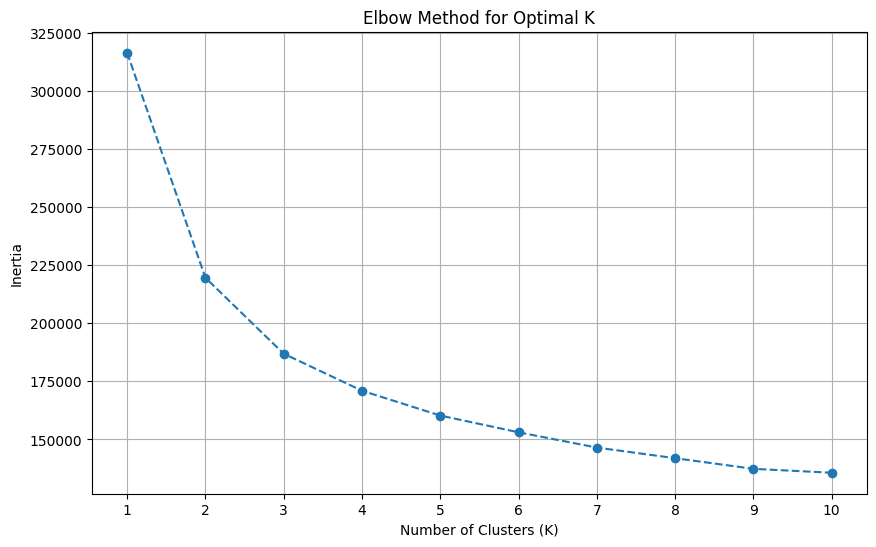

The Elbow Method plot helps identify the optimal number of clusters where the rate of decrease in inertia slows down significantly.


In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create an empty list to store inertia values
inertia_values = []

# Iterate through a range of possible cluster numbers (e.g., 1 to 10)
# The upper limit of 10 is chosen as a reasonable starting point for k,
# but can be adjusted if the elbow isn't clear within this range.
for k in range(1, 11):
    # Initialize KMeans model with n_clusters=k, random_state=42 for reproducibility,
    # and n_init='auto' to run multiple initializations and choose the best one.
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')

    # Fit the KMeans model to the scaled data
    kmeans.fit(df_scaled)

    # Append the inertia (sum of squared distances of samples to their closest cluster center)
    # to the inertia_values list
    inertia_values.append(kmeans.inertia_)

# Create a line plot to visualize the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

print("The Elbow Method plot helps identify the optimal number of clusters where the rate of decrease in inertia slows down significantly.")

## Perform K-Means Clustering

### Subtask:
Apply the K-Means clustering algorithm to the prepared data using the optimal number of clusters identified in the previous step. Assign the resulting cluster labels back to the original DataFrame.


**Reasoning**:
Based on the Elbow Method plot, I will choose 3 as the optimal number of clusters, as the rate of decrease in inertia significantly slows down after this point. Then, I will initialize and fit the KMeans model with this number of clusters to the scaled data and assign the resulting cluster labels to the original DataFrame.



In [7]:
from sklearn.cluster import KMeans

# Optimal number of clusters chosen from the Elbow Method plot (e.g., 3)
optimal_k = 3

# Initialize KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')

# Fit the KMeans model to the scaled data
kmeans.fit(df_scaled)

# Assign the cluster labels to a new column 'Cluster' in the original df DataFrame
df['Cluster'] = kmeans.labels_

print(f"K-Means clustering applied with {optimal_k} clusters.")
print("First 5 rows of df with new 'Cluster' column:")
print(df[['Player', 'Cluster']].head())
print(f"\nCluster distribution:\n{df['Cluster'].value_counts()}")

K-Means clustering applied with 3 clusters.
First 5 rows of df with new 'Cluster' column:
                        Player  Cluster
0     Connor McDavid\mcdavco01        1
1      Sidney Crosby\crosbsi01        1
2        Patrick Kane\kanepa01        1
3  Nicklas Backstrom\backsni02        1
4    Nikita Kucherov\kucheni01        1

Cluster distribution:
Cluster
0    5530
2    5253
1    2403
Name: count, dtype: int64


**Reasoning**:
With the clustering complete and labels assigned, the next logical step is to characterize each cluster. This will involve grouping the original DataFrame by the newly created 'Cluster' column and then calculating the mean of the relevant numerical features for each cluster. This will help in understanding the distinct characteristics of each player group.



In [8]:
print("Characterizing clusters by analyzing feature means:")
cluster_means = df.groupby('Cluster')[clustering_features].mean()
print(cluster_means)

Characterizing clusters by analyzing feature means:
               Age         GP          G          A        PTS  plusminus  \
Cluster                                                                     
0        25.261664  20.048101   1.262025   2.310307   3.572333  -1.626763   
1        27.573866  76.271328  22.456929  33.909280  56.366209   4.575947   
2        27.723015  67.196269   7.311060  14.414430  21.725490  -1.270512   

               PIM        PS         EV        PP  ...      SH.1           S  \
Cluster                                            ...                         
0        15.034358  0.303038   1.064014  0.166365  ...  0.036709   19.979747   
1        44.385768  6.849896  14.862256  6.963379  ...  0.498543  190.280483   
2        45.312203  2.795755   5.621550  1.402246  ...  0.382829   96.516848   

         S_percent          TOI       ATOI        BLK        HIT         FOW  \
Cluster                                                                        
0

**Reasoning**:
Now that the clusters have been characterized by their feature means, the next step is to visualize these clusters using Principal Component Analysis (PCA). This will help in understanding the spatial separation of the clusters in a lower-dimensional space.



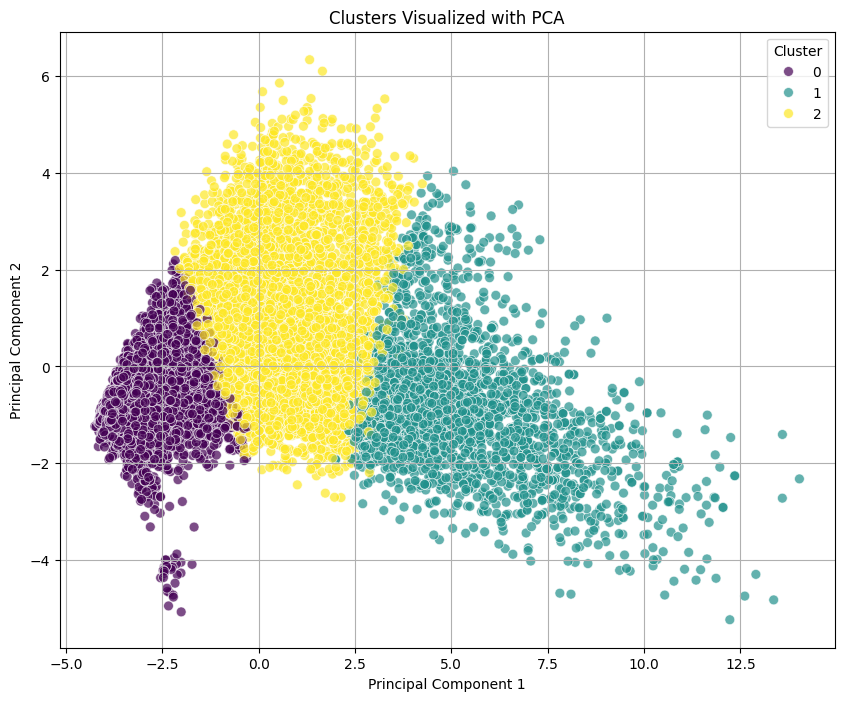

PCA visualization of the clusters completed.


In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize PCA to reduce data to 2 components
pca = PCA(n_components=2)

# Fit PCA to the scaled data and transform it
pca_components = pca.fit_transform(df_scaled)

# Create a DataFrame for the PCA components and add the cluster labels
df_pca = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']

# Create a scatter plot to visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Cluster',
    data=df_pca,
    palette='viridis',
    s=50,
    alpha=0.7
)
plt.title('Clusters Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

print("PCA visualization of the clusters completed.")

## Summary of Distinct Player Characteristics

Based on the K-Means clustering and the analysis of feature means, the following distinct player characteristics have been identified for each cluster:

### Cluster 0: Developing/Role Players (Low Performance, Low Playtime)
This cluster represents a large group of players with the lowest statistics across most performance metrics. They have:
*   **Low Age**: Slightly younger on average.
*   **Low GP (Games Played)**, **Low TOI (Time on Ice)**, and **Low ATOI (Average Time on Ice)**: Indicating limited playing time.
*   **Very Low G (Goals)**, **A (Assists)**, **PTS (Points)**, and **PS (Point Share)**: Suggesting minimal offensive contribution.
*   **Negative plusminus**: Indicating they are often on the ice when the opposing team scores.
*   **Low Shots (S)** and **Shot Percentage (S_percent)**: Further confirming limited offensive impact.
*   **Low PIM (Penalties in Minutes)**, **BLK (Blocked Shots)**, and **HIT (Hits)**: Suggesting less involvement in physical play.
*   **Low FOW (Faceoffs Won)**, **FOL (Faceoffs Lost)**, and **FO_percent (Faceoff Percentage)**: Indicating limited faceoff duties.

These players are likely younger, depth players, or those with very limited roles on their teams, often seen in fewer games or with less ice time.

### Cluster 1: Elite Forwards (High Performance, High Playtime)
This cluster represents the highest-performing players, primarily offensive forwards. They exhibit:
*   **Moderate Age**: Slightly older than Cluster 0 but not the oldest.
*   **High GP**, **High TOI**, and **High ATOI**: Indicating significant playing time.
*   **Very High G**, **A**, **PTS**, and **PS**: Leading in offensive production.
*   **Positive plusminus**: Significantly higher than other clusters, indicating strong overall play.
*   **High Shots (S)** and **Good Shot Percentage (S_percent)**: Highly active offensively and efficient.
*   **Moderate PIM**, **Low BLK**, and **Moderate HIT**: Suggesting offensive focus rather than defensive or physical play.
*   **High FOW**, **High FOL**, and **Highest FO_percent**: Indicating key roles in faceoffs.

These are the star players, top-line forwards, and offensive leaders who drive their team's scoring and often play crucial minutes.

### Cluster 2: Balanced/Defensive Players (Moderate Performance, Moderate Playtime)
This cluster includes players with more balanced roles, likely defensemen or defensive forwards. They show:
*   **Highest Age**: Slightly older on average compared to other clusters.
*   **Moderate GP**, **Moderate TOI**, and **Moderate ATOI**: Solid playing time, but less than elite forwards.
*   **Moderate G**, **A**, **PTS**, and **PS**: Contributing offensively but not at an elite level.
*   **Negative plusminus**: Similar to Cluster 0, indicating a potential struggle in even-strength play or defensive assignments.
*   **Moderate Shots (S)** and **Moderate Shot Percentage (S_percent)**: Contribute shots but are not primary scorers.
*   **Highest PIM**, **Highest BLK**, and **Highest HIT**: Indicating a strong physical and defensive presence.
*   **Moderate FOW**, **Moderate FOL**, and **Moderate FO_percent**: Involved in faceoffs but less dominant than Cluster 1.

This group likely consists of defensemen and two-way forwards who prioritize defensive duties, physical play, and penalty killing, contributing less to offense but more to overall team defense.

## Final Task

### Subtask:
Provide a summary of the distinct NHL player characteristics identified by the clustering analysis, highlighting the key features that differentiate each cluster.


## Summary:

### Q&A
The distinct NHL player characteristics identified by the clustering analysis, highlighting the key features that differentiate each cluster, are as follows:

*   **Cluster 0: Developing/Role Players (Low Performance, Low Playtime)**
    *   These players are characterized by low age, limited playing time (low Games Played, Time on Ice, and Average Time on Ice), minimal offensive contributions (very low Goals, Assists, Points, and Point Share), negative plus/minus, and low involvement in physical play (low Penalties in Minutes, Blocked Shots, and Hits). They also show limited faceoff duties. This cluster likely comprises younger, depth players or those with very restricted roles.

*   **Cluster 1: Elite Forwards (High Performance, High Playtime)**
    *   This cluster represents the highest-performing players, predominantly offensive forwards. They have moderate age, significant playing time, very high offensive production (Goals, Assists, Points, and Point Share), a strong positive plus/minus, high shot volume and good shot percentage, moderate physical engagement, and key roles in faceoffs (high Faceoffs Won and Faceoff Percentage). These are the star players and offensive leaders.

*   **Cluster 2: Balanced/Defensive Players (Moderate Performance, Moderate Playtime)**
    *   This cluster includes players with more balanced roles, likely defensemen or defensive forwards. They are typically the oldest on average, with solid but not elite playing time, moderate offensive contributions, and a negative plus/minus. Their defining characteristics are the highest physical engagement (highest Penalties in Minutes, Blocked Shots, and Hits) and moderate involvement in faceoffs. This group prioritizes defensive duties, physical play, and penalty killing over primary offense.

### Data Analysis Key Findings
*   **Data Preparation:** 24 numerical features were selected for clustering after excluding identifying and non-numerical columns. Missing values were imputed with the mean, and features were scaled using `StandardScaler` to ensure equal contribution.
*   **Optimal Cluster Determination:** The Elbow Method was applied, and an optimal number of 3 clusters was identified as the point where the decrease in inertia significantly slowed down.
*   **K-Means Clustering:** K-Means clustering was successfully performed using 3 clusters. The cluster distribution showed that Cluster 0 contained 5530 players, Cluster 1 had 2403 players, and Cluster 2 comprised 5253 players.
*   **Cluster Characterization:**
    *   **Cluster 0 (Developing/Role Players):** Showed the lowest average values across most performance metrics (e.g., Goals, Assists, Points, Time on Ice), with negative plus/minus and minimal physical stats.
    *   **Cluster 1 (Elite Forwards):** Exhibited the highest average values for offensive metrics (e.g., Goals, Assists, Points, Point Share) and Time on Ice, with a positive plus/minus and high Faceoff Percentage.
    *   **Cluster 2 (Balanced/Defensive Players):** Displayed the highest average age, highest Penalties in Minutes, Blocked Shots, and Hits, indicating a strong physical and defensive presence, alongside moderate offensive output.
*   **PCA Visualization:** Principal Component Analysis reduced the data to two components, effectively visualizing the separation of the three identified clusters in a 2D scatter plot, confirming distinct groupings.

### Insights or Next Steps
*   The clear separation and distinct characteristics of the clusters provide a strong basis for player development strategies, team building, and role assignment. Teams could use this analysis to identify players who fit specific molds or to scout for players with desired characteristics.
*   Further analysis could involve incorporating categorical features (e.g., 'Pos' - Position) into the clustering process (e.g., using mixed-data clustering techniques) or analyzing the year-over-year progression of players within these clusters to understand career trajectories.


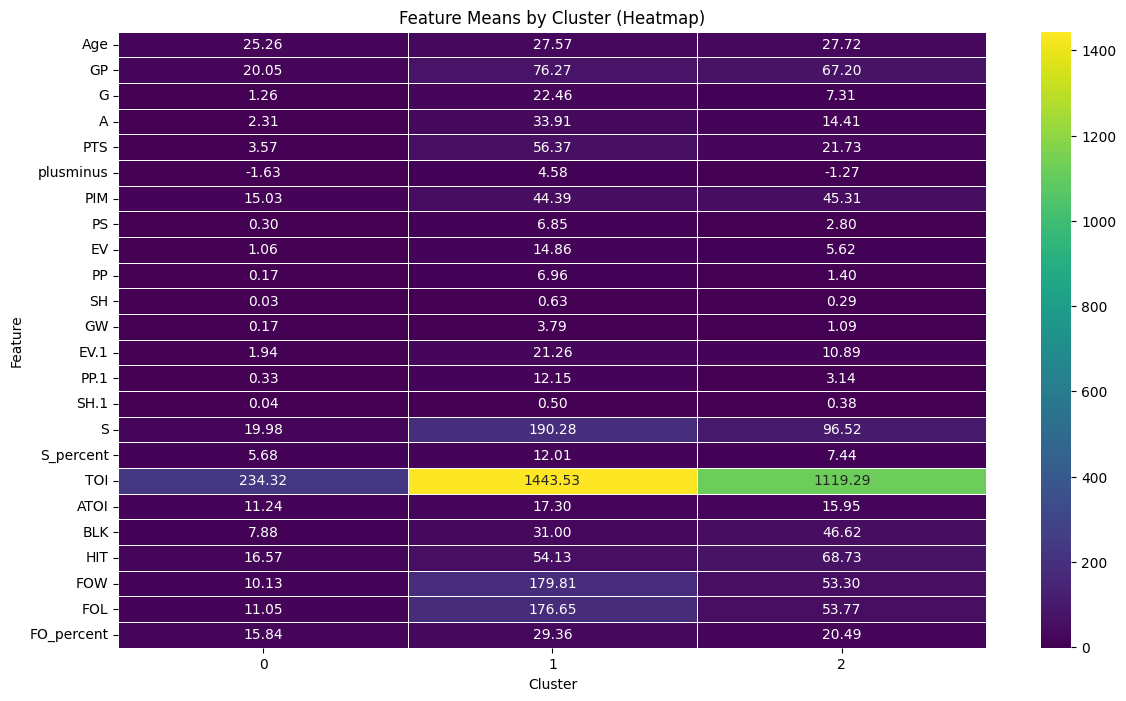

Heatmap of cluster means generated.


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the cluster means
plt.figure(figsize=(14, 8))
sns.heatmap(cluster_means.T, cmap='viridis', annot=True, fmt='.2f', linewidths=.5)
plt.title('Feature Means by Cluster (Heatmap)')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.show()

print("Heatmap of cluster means generated.")

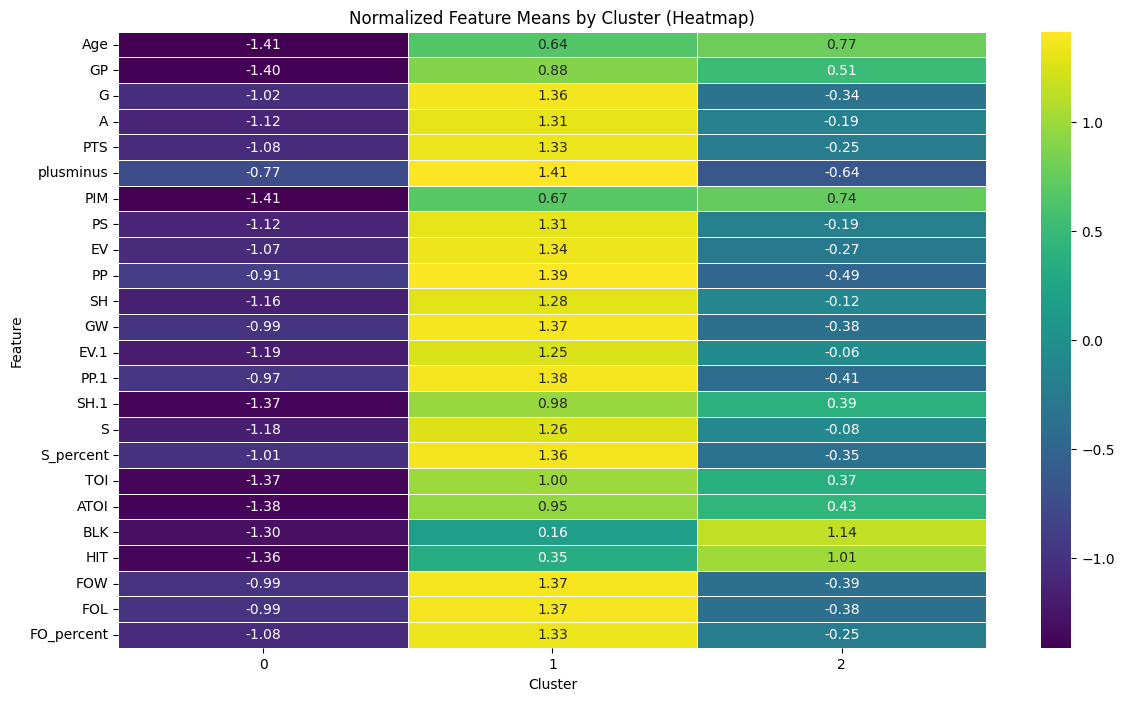

Heatmap of normalized cluster means generated.


In [11]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize a StandardScaler for normalizing the cluster means
# We fit on cluster_means (clusters as rows, features as columns)
# to scale each feature across the clusters (columns).
mean_scaler = StandardScaler()
cluster_means_scaled = pd.DataFrame(mean_scaler.fit_transform(cluster_means),
                                    columns=cluster_means.columns,
                                    index=cluster_means.index)

# Create a heatmap of the normalized cluster means
plt.figure(figsize=(14, 8))
sns.heatmap(cluster_means_scaled.T, cmap='viridis', annot=True, fmt='.2f', linewidths=.5)
plt.title('Normalized Feature Means by Cluster (Heatmap)')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.show()

print("Heatmap of normalized cluster means generated.")